<a href="https://colab.research.google.com/github/Muttaqin86/Data-Science/blob/main/Muttaqin_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")

dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

--2025-10-21 22:53:21--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63832 (62K) [text/plain]
Saving to: ‘data/jakarta.csv’

jakarta.csv         100%[===================>]  62.34K  --.-KB/s    in 0.01s   

2025-10-21 22:53:21 (5.21 MB/s) - ‘data/jakarta.csv’ saved [63832/63832]

--2025-10-21 22:53:21--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.


((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

=== Skala Harga yang Terdeteksi ===
Jakarta   : ×1 (Rupiah)
Depok     : ×1.000.000 (Ribuan)
Bogor     : ×1 (Rupiah)
Tangerang : ×1.000.000 (Ribuan)
Bekasi    : ×1 (Rupiah)

=== Statistik Harga Rumah (Total, Setelah Koreksi) ===
           count          mean           std           min           25%  \
Kota                                                                       
Bekasi     107.0  1.074823e+10  7.516152e+09  1.600000e+09  5.805000e+09   
Bogor      193.0  1.289362e+10  2.115854e+10  6.500000e+08  3.990000e+09   
Depok      118.0  1.194441e+10  1.474387e+10  4.100000e+08  4.850000e+09   
Jakarta    121.0  8.985955e+10  1.587610e+11  3.800000e+09  1.600000e+10   
Tangerang  124.0  3.849556e+10  9.316414e+10  9.500000e+08  1.037500e+10   

                    50%           75%           max  
Kota                                                 
Bekasi     9.200000e+09  1.350000e+10  4.500000e+10  
Bogor      6.700000e+09  1.250000e+10  1.650000e+11  
Depok      8.100000e+09

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


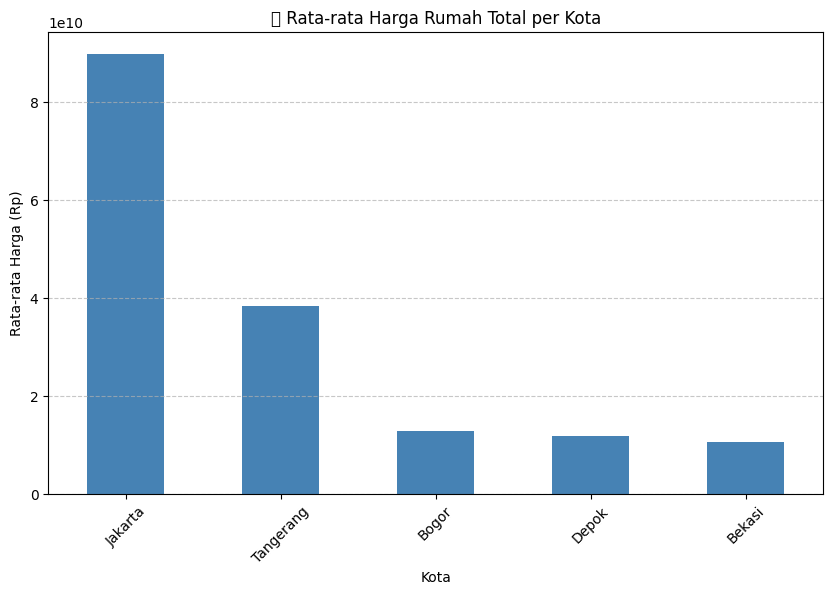

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


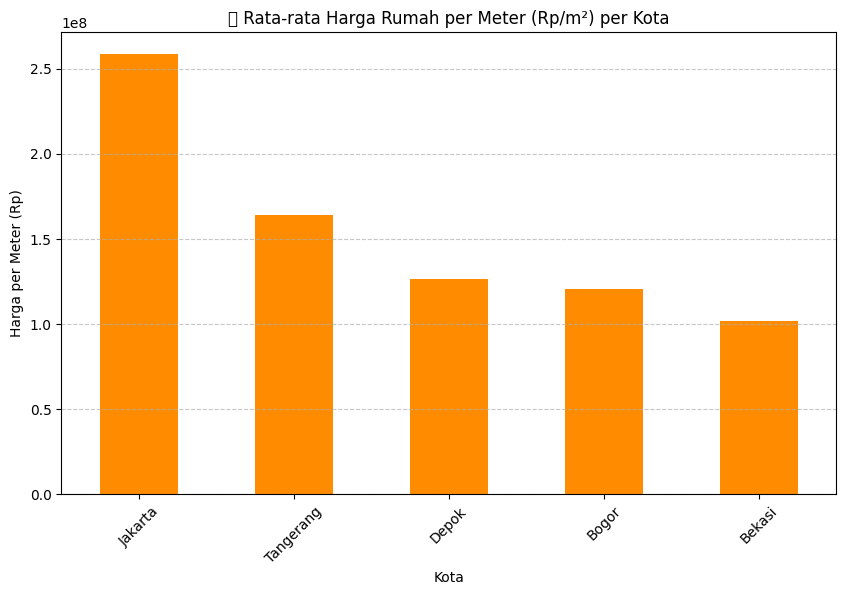

<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


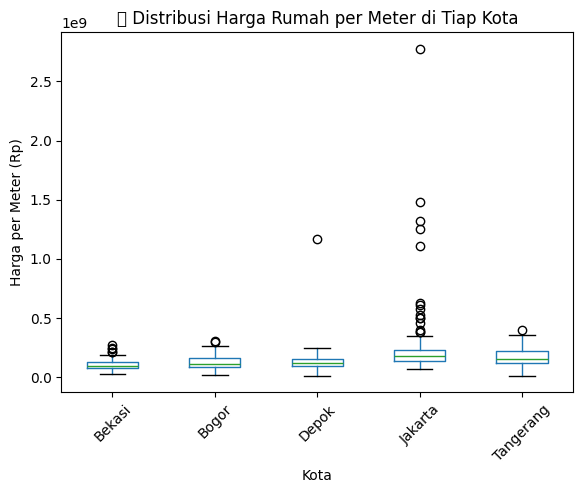

In [8]:
# ======================================================
# 🏡 Analisis Harga Rumah Jabodetabek - Data Cleansing & Analisis
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ======================================================
# 1️⃣ Load Data (lokal atau dari URL)
# ======================================================
try:
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")
except:
    !mkdir -p data
    !wget -q -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
    !wget -q -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
    !wget -q -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bogor.csv
    !wget -q -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/tangerang.csv
    !wget -q -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")

# ======================================================
# 2️⃣ Tambahkan kolom "Kota" agar bisa digabung
# ======================================================
dfJ["Kota"] = "Jakarta"
dfD["Kota"] = "Depok"
dfB["Kota"] = "Bogor"
dfT["Kota"] = "Tangerang"
dfX["Kota"] = "Bekasi"

# ======================================================
# 3️⃣ Gabungkan semua data
# ======================================================
df_all = pd.concat([dfJ, dfD, dfB, dfT, dfX], ignore_index=True)

# ======================================================
# 4️⃣ Cleansing Data
# ======================================================

# Hapus kolom kosong (Unnamed)
df_all = df_all.loc[:, ~df_all.columns.str.contains('^Unnamed')]

# Hapus baris kosong (semua NaN)
df_all.dropna(how='all', inplace=True)

# Bersihkan kolom harga dari simbol dan ubah ke numerik
df_all["harga"] = (
    df_all["harga"]
    .astype(str)
    .str.replace(r'[^0-9]', '', regex=True)
)

df_all["harga"] = pd.to_numeric(df_all["harga"], errors='coerce')
df_all = df_all.dropna(subset=["harga"])
df_all = df_all[df_all["harga"] > 0]

# Pastikan LB (Luas Bangunan) numerik juga
df_all["LB"] = pd.to_numeric(df_all["LB"], errors='coerce')
df_all = df_all.dropna(subset=["LB"])
df_all = df_all[df_all["LB"] > 0]

# ======================================================
# 5️⃣ Deteksi dan Koreksi Skala Harga Tiap Kota
# ======================================================
scale_fix = {}

for city in df_all["Kota"].unique():
    median_price = df_all.loc[df_all["Kota"] == city, "harga"].median()
    if median_price < 1e7:
        scale_fix[city] = 1e6   # harga masih dalam ribuan
    elif median_price < 1e9:
        scale_fix[city] = 1e3   # harga masih dalam jutaan
    else:
        scale_fix[city] = 1     # sudah rupiah penuh

print("=== Skala Harga yang Terdeteksi ===")
for city, factor in scale_fix.items():
    satuan = "×1 (Rupiah)" if factor == 1 else ("×1.000 (Jutaan)" if factor == 1e3 else "×1.000.000 (Ribuan)")
    print(f"{city:10s}: {satuan}")

# Terapkan koreksi skala harga
df_all["harga_fix"] = df_all.apply(lambda x: x["harga"] * scale_fix.get(x["Kota"], 1), axis=1)
df_all["harga_per_meter_fix"] = df_all["harga_fix"] / df_all["LB"]

# ======================================================
# 6️⃣ Statistik Deskriptif Setelah Koreksi
# ======================================================
stat_total = df_all.groupby("Kota")["harga_fix"].describe()
stat_per_m2 = df_all.groupby("Kota")["harga_per_meter_fix"].describe()

print("\n=== Statistik Harga Rumah (Total, Setelah Koreksi) ===")
print(stat_total)

print("\n=== Statistik Harga Rumah per Meter (Rp/m², Setelah Koreksi) ===")
print(stat_per_m2)

# ======================================================
# 7️⃣ Hitung Rata-rata Harga per Kota
# ======================================================
mean_total = df_all.groupby("Kota")["harga_fix"].mean().sort_values(ascending=False)
mean_per_m2 = df_all.groupby("Kota")["harga_per_meter_fix"].mean().sort_values(ascending=False)

print("\nRata-rata harga total per kota (Rp):")
print(mean_total)

print("\nRata-rata harga per meter (Rp/m²) per kota:")
print(mean_per_m2)

# ======================================================
# 8️⃣ Visualisasi
# ======================================================

plt.figure(figsize=(10, 6))
mean_total.plot(kind='bar', color='steelblue')
plt.title("🏙️ Rata-rata Harga Rumah Total per Kota")
plt.ylabel("Rata-rata Harga (Rp)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
mean_per_m2.plot(kind='bar', color='darkorange')
plt.title("📏 Rata-rata Harga Rumah per Meter (Rp/m²) per Kota")
plt.ylabel("Harga per Meter (Rp)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
df_all.boxplot(column="harga_per_meter_fix", by="Kota", grid=False)
plt.title("📦 Distribusi Harga Rumah per Meter di Tiap Kota")
plt.suptitle("")
plt.ylabel("Harga per Meter (Rp)")
plt.xticks(rotation=45)
plt.show()


1. Kualitas Data yang dimiliki saat ini masih belum bersih sepenuhnya karena ada banyak kolom yang kosong atau tidak memiliki nama kolom dan juga banyak baris yang kosong atau tidak memiliki nilai. Selain itu ada data pada kota Tangerang dan Depok yang memiliki nilai harga tidak sesuai dengan kota lain. Sebagai contoh harga di Jakarta : 850000000, Bekasi : 550000000, harga di Bogor : 500000000, sedangkan harga di Tangerang : 500, harga di Depok : 350 sehingga terjadi perbedaan yang sangat jauh. Ini kemungkinan karena salah input dalam satuan nilainya apakah dalam jutaan. Seharusnya dalam penginputan data harus diseragamkan dalam format dan satuannya sehingga memudahkan dalam proses selanjutnya dan menghasilkan analisa yang baik.

2. Saran untuk DE/DBA yaitu agar membuatkan standarisasi penamaan kolom dan menghilangkan data kosong serta membuat validasi dalam penginputan data sehingga data yang tersimpan adalah data yang nilainya sesuai. Selanjutnya perlu juga dibuatkan Data Warehouse dan Dashboard sehingga dapat melihat data aktual dan dapat melakukan analisa lebih cepat.

3. Berdasarkan Data yang ada menunjukkan kota Jakarta memiliki harga yang jauh lebih mahal dibandingkan dengan kota lainnya. Karena kota Jakarta sebagai Pusat Ekonomi dan Bisnis dengan lahan yang terbatas. Sedangkan kota Bekasi menjadi yang terendah dibandingkan dengan kota lainnya walaupun perbedaanya tidak terlalu signifikan. karena masih sebagai kota penyangga Jakarta.

4. Rekomendasi pembukaan cabang yang dapat dilakukan oleh RPPI yiatu membuka cabang di Bekasi karena harga tergolong murah dan akses kendaraan pribadi ataupun transportasi umum mudah untuk menjangkau pusat Ekonomi dan Bisnis di Jakarta. Sehingga banyak pekerja Jakarta yang akan tertarik. Karena rata-rata yang membeli Property di kota Penyangga adalah pekerja Jakarta.

In [11]:
import pandas as pd
import numpy as np

# --- 1️⃣ Gabungkan semua data ---
df_all = pd.concat([dfJ, dfB, dfD, dfT, dfX], ignore_index=True)

# --- 2️⃣ Bersihkan dan normalisasi kolom numerik ---
def clean_numeric(value):
    """Ambil hanya angka pertama dari string, jika tidak ada -> NaN"""
    if pd.isna(value):
        return np.nan
    value = str(value)
    numbers = pd.Series(value).str.extract(r'(\d+)')[0]
    return float(numbers[0]) if not numbers.isna().any() else np.nan

for col in ['KT', 'KM', 'LT', 'LB']:
    df_all[col] = df_all[col].apply(clean_numeric)

# --- 3️⃣ Buang nilai tidak logis ---
df_all.loc[df_all['KT'] > 10, 'KT'] = np.nan
df_all.loc[df_all['KM'] > 10, 'KM'] = np.nan
df_all.loc[df_all['LT'] > 1000, 'LT'] = np.nan
df_all.loc[df_all['LB'] > 1000, 'LB'] = np.nan

# --- 4️⃣ Statistik rata-rata ---
summary = {
    'Rata-rata Kamar Tidur': df_all['KT'].mean(),
    'Rata-rata Kamar Mandi': df_all['KM'].mean(),
    'Rata-rata Luas Tanah (m²)': df_all['LT'].mean(),
    'Rata-rata Luas Bangunan (m²)': df_all['LB'].mean(),
    'Persentase ada Garasi': df_all['garasi'].notna().mean() * 100,
    'Persentase ada Carport': df_all['carport'].notna().mean() * 100,
}

print("=== Karakteristik Rata-rata Rumah Dijual di Jabodetabek ===")
for k, v in summary.items():
    print(f"{k:<30}: {v:,.2f}")

# --- 5️⃣ Distribusi umum ---
print("\n=== Distribusi Rumah Berdasarkan Kamar Tidur ===")
print(df_all['KT'].value_counts().head(5))

print("\n=== Distribusi Rumah Berdasarkan Kamar Mandi ===")
print(df_all['KM'].value_counts().head(5))

print("\n=== Jumlah Listing per Kota ===")
print(df_all['Kota'].value_counts())


=== Karakteristik Rata-rata Rumah Dijual di Jabodetabek ===
Rata-rata Kamar Tidur         : 3.16
Rata-rata Kamar Mandi         : 2.30
Rata-rata Luas Tanah (m²)     : 146.64
Rata-rata Luas Bangunan (m²)  : 139.92
Persentase ada Garasi         : 8.04
Persentase ada Carport        : 13.28

=== Distribusi Rumah Berdasarkan Kamar Tidur ===
KT
2.0    241
3.0    216
4.0     89
5.0     66
6.0     20
Name: count, dtype: int64

=== Distribusi Rumah Berdasarkan Kamar Mandi ===
KM
2.0    225
1.0    215
3.0    110
4.0     60
5.0     36
Name: count, dtype: int64

=== Jumlah Listing per Kota ===
Kota
Jakarta      1024
Bogor         999
Depok         998
Bekasi        992
Tangerang     128
Name: count, dtype: int64


5. Karakteristik rumah yang paling banyak dijual adalah 2 Kamar Tidur.

In [12]:
import pandas as pd

# Gabungkan semua data yang sudah bersih dan punya kolom 'harga_fix'
df_all = pd.concat([dfJ, dfB, dfD, dfT, dfX], ignore_index=True)

# Pastikan kolom numeric ada
df_all = df_all.dropna(subset=['harga', 'LT'])
df_all['harga'] = df_all['harga'].astype(float)
df_all['LT'] = pd.to_numeric(df_all['LT'], errors='coerce')
df_all['harga_per_meter'] = df_all['harga'] / df_all['LT']

# Hitung rata-rata harga per meter per kota
avg_per_city = df_all.groupby('Kota')['harga_per_meter'].mean().to_dict()

# Tambahkan kolom selisih harga dibanding rata-rata kota
df_all['avg_kota'] = df_all['Kota'].map(avg_per_city)
df_all['persentase_lebih_murah'] = (1 - (df_all['harga_per_meter'] / df_all['avg_kota'])) * 100

# Filter rumah yang berpotensi untung (lebih murah dari rata-rata)
invest_candidates = df_all[
    (df_all['harga'] <= 25_000_000_000) &  # Maks 25 Miliar
    (df_all['persentase_lebih_murah'] > 0)
].copy()

# Urutkan dari yang paling undervalued (lebih murah)
invest_candidates = invest_candidates.sort_values(by='persentase_lebih_murah', ascending=False)

# Tampilkan 10 rekomendasi teratas
columns_to_show = ['Kota', 'lokasi', 'harga', 'LT', 'LB', 'harga_per_meter', 'avg_kota', 'persentase_lebih_murah', 'URL']
print("\n=== 🔎 10 Rekomendasi Rumah Potensial untuk Investasi (≤ 25 M) ===")
print(invest_candidates[columns_to_show].head(10))



=== 🔎 10 Rekomendasi Rumah Potensial untuk Investasi (≤ 25 M) ===
           Kota                   lokasi         harga      LT    LB  \
14      Jakarta            Jakarta Pusat  1.050000e+09  3422.0  64.0   
3054  Tangerang  BSD THE ICON, TANGERANG  9.500000e+01   128.0  88.0   
1162      Bogor                 Sukaraja  6.500000e+07   119.0  36.0   
2088      Depok                    Tapos  4.100000e+01    60.0  42.0   
1148      Bogor              Bogor Barat  6.500000e+07    93.0  36.0   
1175      Bogor                  Dramaga  6.500000e+07    84.0  36.0   
1034      Bogor             Tanah Sareal  2.500000e+08   312.0  70.0   
3028  Tangerang       SEPATAN, TANGERANG  1.480000e+02    72.0  45.0   
1149      Bogor               Bojonggede  7.000000e+07    60.0  36.0   
82      Jakarta           Jakarta Utara   4.980000e+08    90.0  36.0   

      harga_per_meter      avg_kota  persentase_lebih_murah  \
14       3.068381e+05  3.496681e+07               99.122488   
3054     7.421

6. Untuk rekomendasi investasi RPPI dapat berinvestasi pada rumah tersebut karena memili harga lebih murah dibandingkan harga pasaran.

7. Untuk Informasi berharga yang dapat diambil dari data adalah mendapatkan harga rumah yang berada di bawah pasaran sehingga dapat mendapatkan keuntungan yang lebih tinggi. serta mendapatkan titik - titik dimana pasar property akan terus berkembang sehingga dapat menjadikan potensi bisnis ke depannya.